# Three things you need to know in your journey to find happiness 

#### Based on the World Happiness Report from 2015 to 2020. I want to provide advice to people who are looking for a happy place to live, based on the following three questions:

Question 1: Which are the happist places in the world?

Question 2: Which places have the largest happiness change through out the years?

Question 3: What factors contribute to happiness?

In [67]:
# import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [68]:
# import data 
df1 = pd.read_csv('world-happiness/2015.csv')
df2 = pd.read_csv('world-happiness/2016.csv')
df3 = pd.read_csv('world-happiness/2017.csv')
df4 = pd.read_csv('world-happiness/2018.csv')
df5 = pd.read_csv('world-happiness/2019.csv')
df6 = pd.read_csv('world-happiness/2020.csv')

In [69]:
# Assess and understand data columns and types 
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Data Description

#### y:
Happiness Score

#### X :
##### Categorical:

Region (geographic region larger then contry such as western Europe, Categorical)

##### Quantitative:
GDP

Social support

Heahthy life expectancy

Freedom to make life choices 

Generosity 

Perception of corruption 

#### These variables are quite self-explanatory might have slightly different names in different year's data, and they'll be cleaned. There are some other variables I didn't use (for example, happiness rank) in this analysis, so it was not mentioned here. 

In [70]:
# Data cleaning: 
# Extract only important variables in 2020's data 
df6 = df6[['Country name','Regional indicator','Ladder score','Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption']]

# extract different contries' happiness score as y variable
df1_score = df1[['Country','Region','Happiness Score']]
df2_score = df2[['Country','Happiness Score']]
df3_score = df3[['Country','Happiness.Score']]
df4_score = df4[['Country or region','Score']]
df5_score = df5[['Country or region','Score']]
df6_score = df6[['Country name','Ladder score']]

# Unifying variable names in different years' dataset
df1_score.rename(columns = {'Happiness Score':'Score1'},inplace = True)
df2_score.rename(columns = {'Happiness Score':'Score2'},inplace = True)
df3_score.rename(columns = {'Happiness.Score':'Score3'},inplace = True)
df4_score.rename(columns = {'Country or region':'Country','Score':'Score4'},inplace = True)
df5_score.rename(columns = {'Country or region':'Country','Score':'Score5'},inplace = True)
df6.rename(columns={'Country name': 'Country','Reginonal indicator': 'Region','Ladder score': 'Score'},inplace=True)
df6_score.rename(columns = {'Country name': 'Country','Ladder score':'Score6'},inplace = True)

# renaming 2020's data to make it more succinct 
df6.rename(columns = {'Explained by: Log GDP per capita':'GDP',
                      'Explained by: Social support':'Social_support',
                      'Explained by: Healthy life expectancy':'HLE',
                     'Explained by: Freedom to make life choices':'Freedom',
                      'Explained by: Generosity':'Generosity',
                      'Explained by: Perceptions of corruption':'Perceptions_of_Corruption'},
          inplace = True)


C:\Users\Lingyan\Anaconda\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


 #### Q1: Which are the happiest regions in the world?

(0, 10)

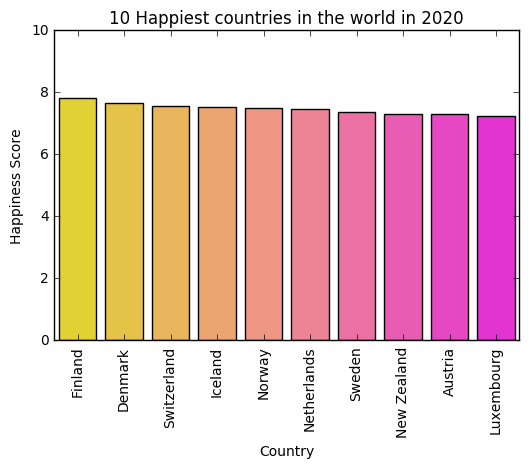

In [71]:
# Sort 2020's data on happiness score to find which countries have highest happiness score
happy_rank = df6[['Country','Score']].sort_values('Score',ascending=False)[:10]
# plot
happy_rank.rename(columns = {'Score':'Happiness Score'},inplace=True)
sns.barplot(happy_rank['Country'],happy_rank['Happiness Score'],palette='spring_r')
plt.xticks(rotation=90)
plt.title('10 Happiest countries in the world in 2020');
plt.ylim((0,10))

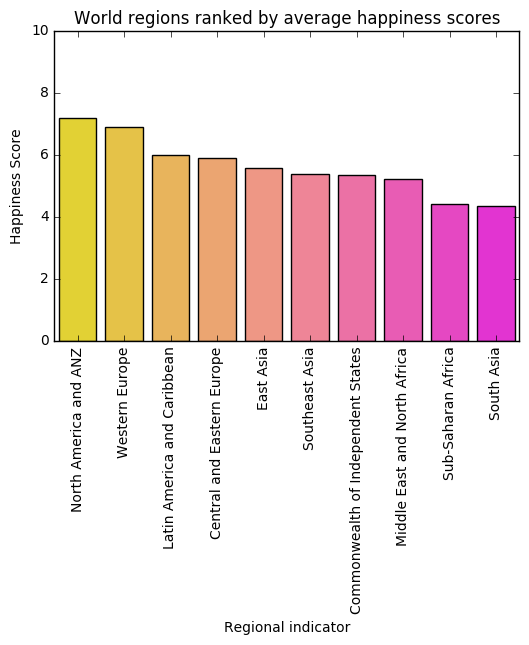

In [72]:
# Sort 2020's data on happiness score to find which regions have highest happiness score 
# combine df1 and df6 to assign region variables to different countries in df6 (2020)
df1_df6 = df6.merge(df1,how = 'inner',on = 'Country')
# average happiness values in different regions
region_mean_20 = df1_df6[['Regional indicator','Score']].groupby('Regional indicator').mean().sort_values('Score',ascending = False)
# plot
sns.barplot(region_mean_20.index, region_mean_20.rename(columns = {'Score':'Happiness Score'})['Happiness Score'],palette='spring_r')
plt.xticks(rotation=90)
fig = plt.gcf()
plt.ylim((0,10))
plt.title('World regions ranked by average happiness scores')
plt.show()


#### Answer of question 1:
Finland is the happiness country in the world

North America and ANZ (Australia and New Zealand) is the happiest region in the world

 #### Q2: Which places have the largest happiness change through out the years?

In [73]:
# merge score data from 2015 and 2020 years and calculate difference 
df_years = df1_score.merge(df6_score,how = 'inner',on = 'Country')
df_years.insert(4,'Diff',df_years['Score6']-df_years['Score1'])
df_years.head()

,Country,Region,Score1,Score6,Diff
0,Switzerland,Western Europe,7.587,7.5599,-0.0271
1,Iceland,Western Europe,7.561,7.5045,-0.0565
2,Denmark,Western Europe,7.527,7.6456,0.1186
3,Norway,Western Europe,7.522,7.4880,-0.0340
4,Canada,North America,7.427,7.2321,-0.1949


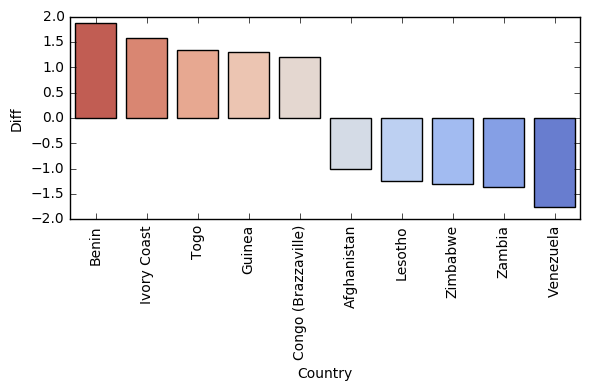

In [74]:
# First 5 positive changes and first 5 negative changes 
sns.barplot(x = 'Country',y = 'Diff',data = df_years, palette='coolwarm_r',order = df_years.sort_values('Diff',ascending = False)['Country'][:5].append(df_years.sort_values('Diff')['Country'][:5].iloc[::-1]))
plt.xticks(rotation=90)
plt.tight_layout()

#### Answer of question 2:
Benin has the largest positive changes from 2015 to 2020

Afghanistan has the largest negative changes 

#### Question 3: What factors contribute to happiness?


In [79]:
# further clean 2020 data 
df = df6
# drop out rows where Score (y variable) doesn't exist
df = df.dropna(subset = ['Score'],axis = 0)

# separate X and y variable
X = df.drop(['Country','Score'],axis = 1)
y = df['Score']

# fill non-categorical X variables with mean to null values 
num_vars = X.select_dtypes(include=['int','float']).columns 
for col in num_vars:
    X[col].fillna(X[col].mean(),inplace = True)

# replace categorical X variables 
cat_vars = X.select_dtypes(include=['object']).columns 
for var in cat_vars:
    X = pd.concat([X.drop(var,axis = 1),pd.get_dummies(X[var],prefix=var,prefix_sep='_',drop_first=True)],axis = 1)
 

In [80]:
#split train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# build linear regression model and fit
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train)

# predict and calculate r2 score in train and test dataset 
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
test_score

0.7275220956123611

In [81]:
# plot the most important factors 
coefs_df = pd.DataFrame()
coefs_df['Factors'] = X_train.columns
coefs_df['Weights'] = lm_model.coef_
coefs_df = coefs_df.sort_values('Weights', ascending=False)
coefs_df.head().reset_index()[['Factors','Weights']]

,Factors,Weights
0,Generosity,1.486931
1,Freedom,1.438842
2,Social_support,0.915516
3,GDP,0.765970
4,HLE,0.693508


#### Answer of question 3:
A linear regression model could well capture and predict (r2 = 0.73)  happiness score, indicating all countries showing similar factors predicting happiness 

The most important factors are Generosity, Freedom (to make life choices), and social support 